- Feature Engineering is the process of using domain knowledge of the data to create features or variables that make machine learning algorithms work.
- Feature Engineering includes :  
  1. filling missing values within a variable  
  2. encoding categorical variables into numbers  
  3. variable transformation  
  4. creating or extracting new features from the available variables in the dataset  
- pip install feature-engine
- pip install category-encoders

- Variables are of 4 type:  
    __1. Numerical__  
    __2. Categorical :__ The values of a categorical variable are selected from a group of categories, also called labels.  
    e.g. marital status (married, single, ...), gender (male, female), mobile network provider (Vodaphone, Airtel, BSNL, ...)  
    __3. Date and Time :__ take dates and/ or time as values  
    e.g. Date of birth ('29-08-1987'), Date of application ('2016-Dec'), Time of accident (12:20:45), Payment Date ('29-08-1987 15:20.20')  
    __4. Mixed Variables :__ Variable that contain both numbers and categoriesamong their values.  
    e.g. Number of credit accounts (1-100, U, T, M) where U = unknown, T = unverified, M = unmatched
- Numerical variable is divided into two types:  
    __1. Discrete :__ A variable whose values are whole numbers (counts)  
    e.g. number of items bought by a customer in a supermarket (10, 50, ...)  
         number of active bank accounts of a borrower (1, 4, 7, ...)  
    __2. Continuous :__ A variable that may contain any value within some range  
    e.g. amount paid by a customer in a supermarket (32.50, 12.5, 20 ...)  
         time spent surfing a website (3.4 seconds, 5.10 seconds, ...)  
- Categorical variable is divided into 4 types:  
    __1. Nominal :__ Categorical variables whose labels do not show any intrinsic order.  
    e.g. country of birth (India, Argentina, USA, Germany), Postcode  
    __2. Ordinal :__ Categorical variables in which categories can be meaningfully ordered.  
    e.g. student's grade in an exam (A, B, C or Fail), Days of the week (Monday = 1 and Sunday = 7)  
    __3. Special Cases :__  
    (i) Categorical variables where categories are encoded as numbers  
    e.g. gender may be coded as 0 for males and 1 for females  
    (ii) Id variables : number that uniquely identifies an observation. It just a random number generated to uniquely identify the observation.

- There are 3 main mechanisms that lead to missing data.  
1. Missing data Completely At Random (MCAR)  
2. Missing data At Random (MAR)  
3. Missing data Not At Random (MNAR)  
- Understanding the missing data mechanisms may help us choose the right missing data imputation technique.

__1. Missing Completely at Random (MCAR) :__  A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on, that makes some data more likely to be missing than other.

In [160]:
import pandas as pd

In [161]:
df = pd.read_csv('titanic_train_dataset.csv')

In [162]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
#finding out null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__Why there are more missing values in 'Age' and 'Cabin' column? Do they have some kind of relation?__  
- Yes there is relationship between 'Age' and 'Cabin'.
- This data is collected after the accident happened. After the accident happened, the person details (Name, Sex, PassengerId, Ticket, Fare, Pclass, Survived) are there but when we went to ask the person's age, the people are already dead. Who will give the answer. No family members are there. Because of that most of the NaN values are there w.r.t 'Age'.
- Why 'Cabin' is related to 'Age'? The person who are dead & whose 'Age' is also missing, might be staying in that particular Cabin which is missing. Probably because of which, that information is not recorded.  

__Can you say that 'Age' and 'Cabin' missing values are missing completely at random (MCAR)?__  
- As there is some relationship between the 'Age' and 'Cabin', we can not say that the missing values in these two columns are of the type MCAR.  

__Is 'Embarked' is of the type MCAR?__
- Here we have 2 NaN values. Embarked means from which station the passengers had been picked up. And we dont have any clue why there is these 2 NaN values. Hence it is an example of MCAR. 

In [164]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [165]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


__2. Missing Data Not At Random (MNAR) (Systematic missing values) :__ When data is MNAR, there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. Example: 'Age' and 'Cabin'

In [166]:
#wherever in Cabin there is NaN,we will convert that NaNs to 1s and 0s

import numpy as np
#creating a new column
#wherever there is NaN in Cabin, we are replacing it with 1, else 0
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0) 

#find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


__If a person had survived i.e. 1 in 'Survived' column, the value of 'Cabin' should not be missing i.e. 0 in cabin_null column.  So what percentage of survived people is having non-missing values in 'Cabin' column?__

In [168]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

- So it can be seen from above result that, from the survived people, 60% of them are having missing values in 'Cabin' column. From the non-survived people 87% of having missing values in 'Cabin' column.
- Again this missing % is true. Because for the people who have not survived, that only information will be missing. So definitely this above result shows that the % is higher than the % for the people who have survived.

__3. Missing At Random (MAR):__ Example: Men hide their Salary, Women hide their Age.

# TECHNIQUES TO HANDLE MISSING VALUES OF CONTINUOUS FEATURES:
__1. Mean/Median/Mode imputation__  
__2. Random Sample imputation__  
__3. Capturing NaN values with a new feature__  
__4. End of Distribution imputation__  
__5. Arbitrary value imputation__

## 1. Mean/Median/Mode imputation
- Replace the NaN values with Mean/Median/Mode values.

__When to apply this technique?__  
- Mean/Median imputation has the assumption that the data are missing completely at random (MCAR). We solve this by replacing the NaN with the most frequent occurance of the variable.

In [169]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [170]:
#% of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

- So there is missing values in Age feature. We have to fill these missing values with mean/median of the feature.

In [171]:
#creating a function which will impute NaN values with Mean/Median
#df is the dataset, feature_name is the feature in which we will replace NaN values
#mode is either Mean or Median value of the selected feature, which will replace the NaN values.
def impute_nan(df, feature_name, median):
    df[feature_name + '_median'] = df[feature_name].fillna(median)

In [172]:
#finding out the median of the 'Age'feature
median_value = df.Age.median()
median_value

28.0

- Here we are not taking the Mean of the feature as there might be outliers. And mean value is affected by the outliers.

In [173]:
#calling the above created function
impute_nan(df, 'Age', median_value)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


- Age_median is the new column that we created in the function to separately store the updated values of Age feature.

In [174]:
#comparing Age & Age_median
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


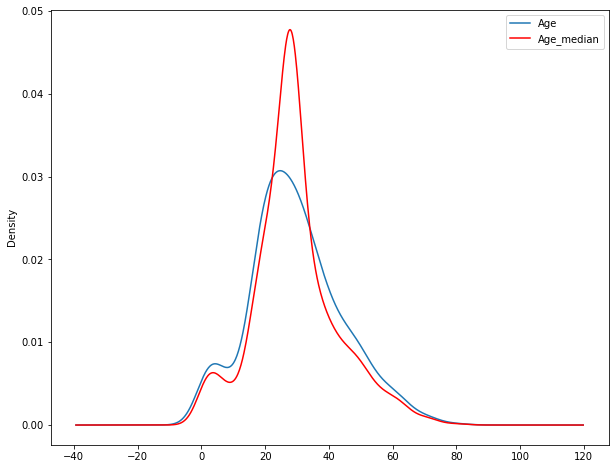

In [175]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

__Advantages of Mean/Median Imputaion:__  
- Easy to implement (Robust to outliers)
- Faster way to obtain the complete dataset

__Disadvantages of Mean/Median Imputation:__  
- Change or distortion in the original variance
- Impacts Correlation

## 2. Random Sample Imputation
- This technique consists of taking random observation from the dataset and we use this observation to replace the NaN values.

__When to use this technique?__  
- It assumes that the data are missing completely at random (MCAR). So in cases of MCAR, we will be using this technique.

In [176]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [177]:
#% of null values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [178]:
#getting the total number of NaN values in 'Age' column
df['Age'].isnull().sum()

177

In [179]:
df['Age'].dropna().sample()

280    65.0
Name: Age, dtype: float64

- As we can see sample() returns only one random value. But we require 177 values. Hence we will use below method.

In [180]:
#replacing all the NaN values with the random value
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [181]:
#indexes of the null values of the 'Age' column
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [182]:
#function to replace the NaN values with random value
def impute_nan(df, feature_name):    
    #creating a new feature in the dataset after replacing NaN with random value
    df[feature_name + '_random'] = df[feature_name]
    #random sample to fill the NaN
    random_sample = df[feature_name].dropna().sample(df[feature_name].isnull().sum(), random_state = 0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[feature_name].isnull()].index
    
    df.loc[df[feature_name].isnull(), feature_name + '_random'] = random_sample

In [183]:
impute_nan(df, 'Age')

In [184]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


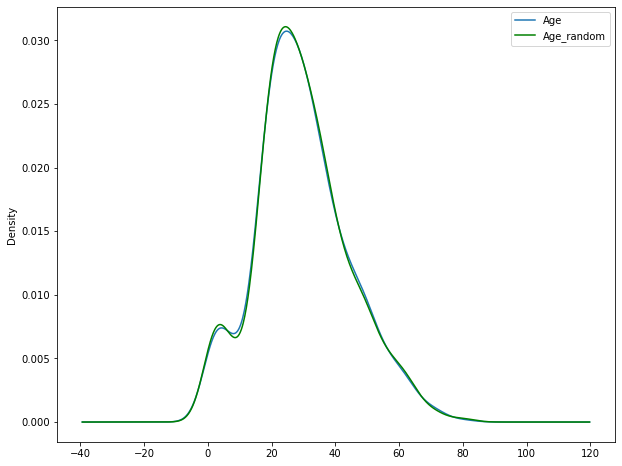

In [185]:
#plotting
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_random'].plot(kind = 'kde', ax = ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

- In the previous technique our variance was distorted. But by this technique we got the graphs which are almost same. Hence this technique is better than the Mean/Median imputation method.

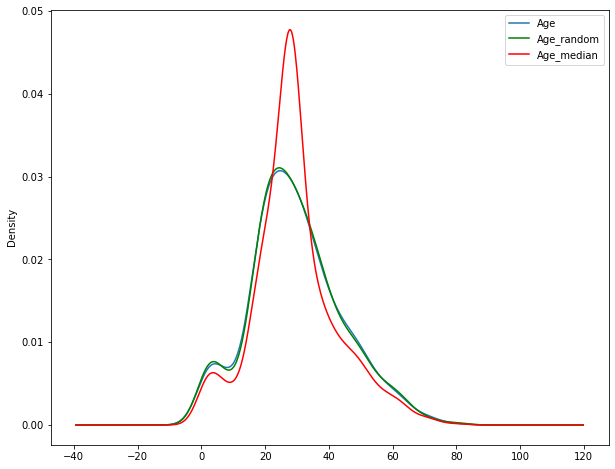

In [186]:
#plotting median curve along with the above two

df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

#function to replace the NaN values with random value
def impute_nan(df, feature_name, median):
    #creating a new column to store the updated values after replacing NaN with median value
    df[feature_name + '_median'] = df[feature_name].fillna(median)
    #creating a new feature in the dataset after replacing NaN with random value
    df[feature_name + '_random'] = df[feature_name]
    #random sample to fill the NaN
    random_sample = df[feature_name].dropna().sample(df[feature_name].isnull().sum(), random_state = 0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[feature_name].isnull()].index
    
    df.loc[df[feature_name].isnull(), feature_name + '_random'] = random_sample
    
#finding out the median of the 'Age'feature
median_value = df.Age.median()
median_value

#calling the function impute_nan()
impute_nan(df, 'Age', median_value)
    
#plotting
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_random'].plot(kind = 'kde', ax = ax, color = 'green')
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

__Advantages of Random Sample Imputation :__  
- Easy to implement
- There is no distortion in variance

__Disadvantage of Random Sample Imputation :__  
- In every situation, randomness will not work

## 3. Capturing NaN values with a new feature
__When to use this technique?__  
- It works well if the data are not missing completely at random (MNAR).

In [187]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [188]:
#creating new feature to capture null & not null values in the form of 1s & 0s
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


- Because of this new feature 'Age_NAN', wherever the values being NULL, it will be noted by 1. That shows the importance of missing value. And later we will use that for model creation.

In [189]:
#filling the NaN value of 'Age' column with the median/mean value
df['Age'].fillna(df.Age.median(), inplace = True)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


__Advantages of Capturing NaN values with a new feature :__  
- Easy to implement
- Captures the importance of missing values

__Disadvantage of Capturing NaN values with a new feature :__  
- Creates additional features, which leads to __Curse of Dimensionality__ 

## 4. End of Distribution imputation
- If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [190]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

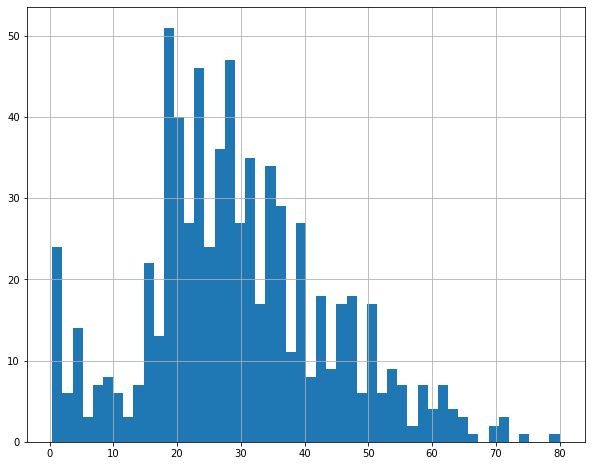

In [191]:
plt.figure(figsize = (10, 8))
df.Age.hist(bins = 50)   #drawing histogram

__We will try to take the far end of the distribution, pick up some value & will replace the NaN value with that.__

In [192]:
#mean (center value) of feature 'Age'
df.Age.mean()

29.69911764705882

- We have to pick the data which are beyond 3*standard deviation from mean. Refer Normal Distribution curve.

In [193]:
#data beyond 3*standard deviation
extreme_right = df.Age.mean() + 3*df.Age.std()
extreme_right

73.27860964406095

<AxesSubplot:xlabel='Age'>

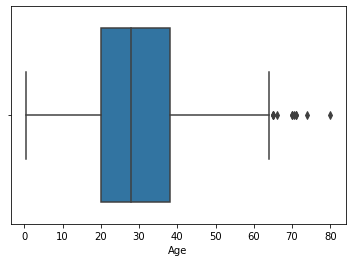

In [194]:
#finding out outlier though boxplot
import seaborn as sns

sns.boxplot(data = df, x = 'Age')

In [195]:
def impute_nan(df, feature_name, median, extreme_value):
    #creating new feature & filling the NaN with extreme value
    df[feature_name + '_end_distribution'] = df[feature_name].fillna(extreme_value)
    #filling the NaN with median value
    df[feature_name].fillna(median, inplace = True)

In [196]:
#calling function
impute_nan(df, 'Age', df.Age.median(), extreme_right)
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

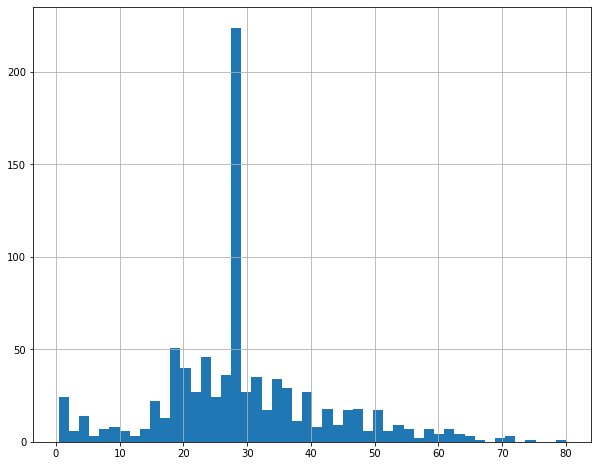

In [197]:
#drwaing histogram on 'Age' feature after replacing NaN with median value 
plt.figure(figsize = (10, 8))
df['Age'].hist(bins = 50)

<AxesSubplot:>

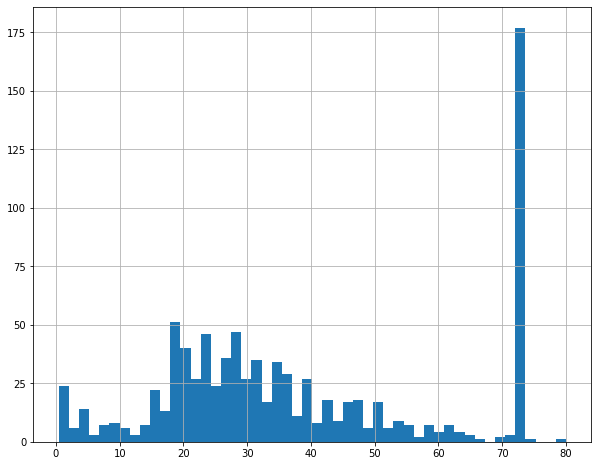

In [198]:
#drwaing histogram on 'Age_end_distribution' feature
plt.figure(figsize = (10, 8))
df['Age_end_distribution'].hist(bins = 50)

#### Which one is better?

<AxesSubplot:xlabel='Age'>

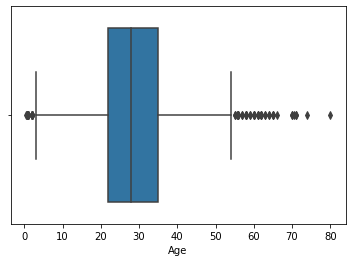

In [199]:
#drawing boxplot on 'Age' feature to check outlier
sns.boxplot(data = df, x = 'Age')

- You can see there are outliers when we replaced NaN with median value.

<AxesSubplot:xlabel='Age_end_distribution'>

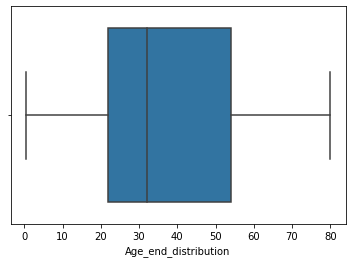

In [200]:
##drawing boxplot on 'Age_end_distribution' feature to check outlier
sns.boxplot(data = df, x = 'Age_end_distribution')

- But here you can see there is no outlier when we replaced NaN with some data at end of the distribution. Hence this one is better.

__Advantages of End of Distribution imputation :__  
- Easy to implement
- Captures the importance of missing data

__Disadvantages of End of Distribution imputation :__  
- Distorts the original distribution of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
- If the number of NA is big, it will mask true outliers in the distribution
- If the number of NA is small, the replaced NA may be considered as an outlier and pre-processed in subsequent feature engineering.

## 5. Arbitrary Value imputation
- It consists of replacing NaN by an arbitrary value. This technique was derived from kaggle competition.
- Arbitrary value means the value should not be more frequently present.
- Last outliers are taken in this technique to fill the NaN. It may be least outlier or max outlier.

In [201]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

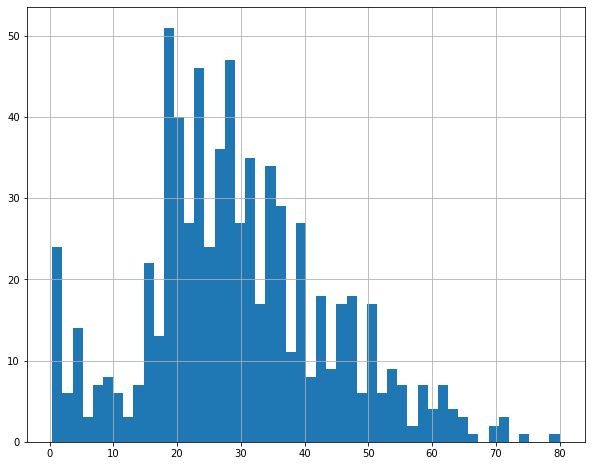

In [203]:
plt.figure(figsize = (10, 8))
df.Age.hist(bins = 50)

In [204]:
#creating an impute function
def impute_nan(df, feature_name):
    #replacing NaN value with 0
    df[feature_name + '_zero'] = df[feature_name].fillna(0)
    #replacing NaN value with 80
    df[feature_name + '_hundred'] = df[feature_name].fillna(80)

In [205]:
#calling the function
impute_nan(df, 'Age')
df

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,80.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:>

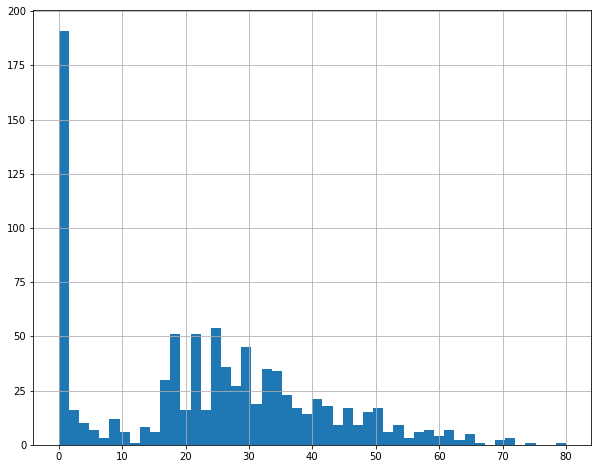

In [207]:
plt.figure(figsize = (10, 8))
df.Age_zero.hist(bins = 50)

<AxesSubplot:xlabel='Age_zero'>

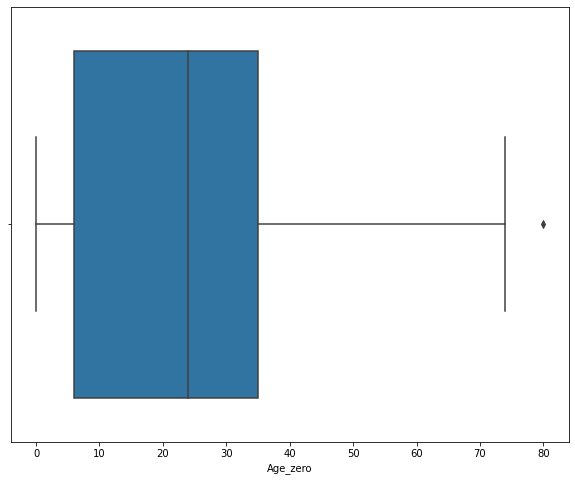

In [209]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, x = 'Age_zero')

<AxesSubplot:>

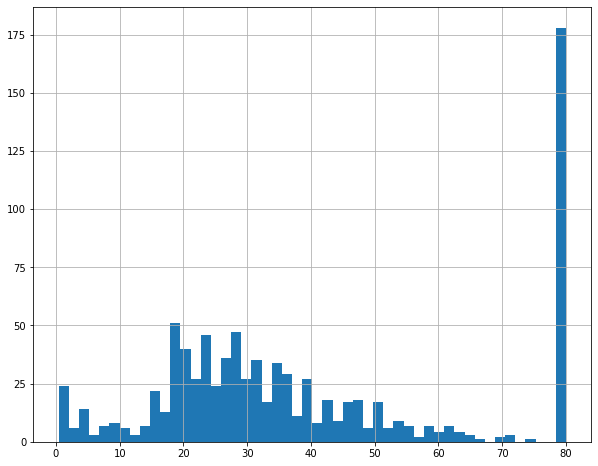

In [208]:
plt.figure(figsize = (10, 8))
df.Age_hundred.hist(bins = 50)

<AxesSubplot:xlabel='Age_hundred'>

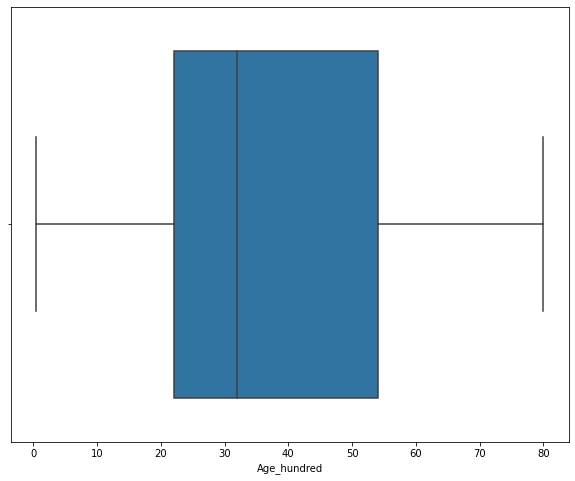

In [210]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, x = 'Age_hundred')

__Advantages of Arbitrary Value imputation :__  
- Easy to implement
- Captures the importance of missingness if there is one

__Disadvantages of Arbitrary Value imputation :__  
- Distorts the original distribution of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

# TECHNIQUES TO HANDLE MISSING VALUES OF CATEGORICAL FEATURES:
__1. Frequent category imputation__  
__2. Adding a variable to capture NaN__

## 1. Frequent category imputation

In [52]:
import pandas as pd

In [53]:
#dataframe with categorical features except 'SalePrice'
df = pd.read_csv('advanced_house_prices_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
#% of null values
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [55]:
#finding total no. of null values per feature
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

- Here we can see that 'BsmtQual' and 'GarageType' are having less number of missing values. So we can replace this with the most frequent category that are available in the 'BsmtQual' and 'GarageType' respectively.
- Since these are having less missing values, replacing with the most frequent category will not distort the relationship between the features who are having the maximum frequent number of categories or who are having the features having less number of features.
- Since there are less number of missing features in 'BsmtQual' and 'GarageType', we can take the most frequent categories & replace it.

In [56]:
#compute the frequency with every feature
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In 'BsmtQual' feature, TA is having highest no. of frequent categories.

<AxesSubplot:>

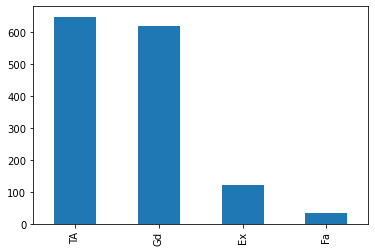

In [57]:
#plotting bar chart for 'BsmtQual'
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

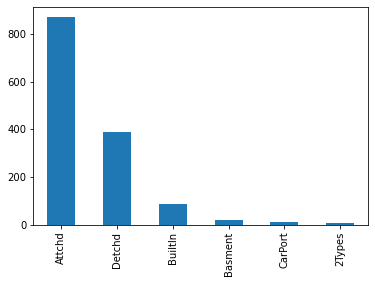

In [58]:
#plotting bar chart for 'BsmtQual'
df['GarageType'].value_counts().plot.bar()

In 'GarageType', Attchd has the highest number of values.

<AxesSubplot:>

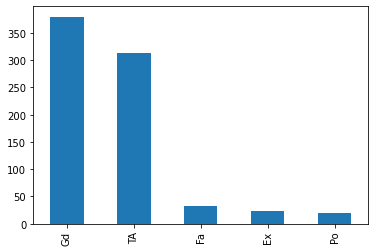

In [59]:
#plotting bar chart for 'BsmtQual'
df['FireplaceQu'].value_counts().plot.bar()

In 'FireplaceQu', Gd has the highest number of values.

In [60]:
#impute function to get the most frequent feature
def impute_nan(df, feature_name):
    most_frequent_category = df[feature_name].value_counts().index[0]
    df[feature_name].fillna(most_frequent_category, inplace = True)

In [61]:
#calling the function
for feature in ['BsmtQual', 'GarageType']:
    impute_nan(df, feature)

In [62]:
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.472603
GarageType     0.000000
SalePrice      0.000000
dtype: float64

Now you can see here that the no. of null values in 'BsmtQual' and 'GarageType' are 0.

__Advantages of Frequent Category imputation :__  
- Easy to implement
- Faster way to implement

__Disadvantages of Frequent Category imputation :__  
- Since we are using the most frequent labels, it may use them in an over represented way, if there are many NaN values.
- It distorts the relationship of the most frequent label

## 2. Adding a variable to capture NaN

- __Whenever you have a situation where you have lot of missing values, try to use this particular technique w.r.t one feature.__

In [63]:
df = pd.read_csv('advanced_house_prices_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
import numpy as np

#adding a new feature with values as 1 & 0 for null & not null values in 'BsmtQual' feature respectively
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [65]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [66]:
#finding the most frequent category in 'BsmtQual' feature
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [67]:
#filling the NaN values of 'BsmtQual' with the most frequent feature
df['BsmtQual'].fillna(frequent, inplace = True)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [70]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [71]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


- __Suppose if you have more frequent categories, we just replace NaN with a new category.__

In [87]:
df = pd.read_csv('advanced_house_prices_train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [88]:
def impute_nan(df, feature_name):
    df[feature_name + '_newvar'] = np.where(df[feature_name].isnull(), 'Missing', df[feature_name])

In [89]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [90]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


- After these 3 new features have been added, we drop the initial 3 features i.e. 'BsmtQual', 'FireplaceQu' & 'GarageType' as these are not required.

In [91]:
df.drop(columns=['BsmtQual', 'FireplaceQu', 'GarageType'], axis = 1, inplace = True)
df

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
